# Project 3 Analysis - Lander design

This notebook contains the analysis for Project 3, using the `lander.py` module.

The following is an example of how I set up my analysis notebook. You are free to modify this as you'd like.

## Import statements

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import importlib
import lander as lander
importlib.reload(lander)


<module 'lander' from 'C:\\Users\\Randy666\\documents\\projects\\ae199-spr-2020\\project3-lander-design-RandyChen233\\lander.py'>

## Part 1: Define parameter defaults

In [4]:
#modules already defined in lander.py
#running a trial simulation using the following default parameters

body_params = {'body_mass': 0.66,
               'body_diameter': 0.0762,
               'body_length': 0.5,
               'bod_cd': 1.2}
fin_params = {'fin_mass': 0.05,
              'fin_height': 0.064,
              'fin_width': 0.099,
              'fin_cd': 1.20,
              'n_fins': 3}  
initial_params = {'position': 20,
                  'velocity': 0,
                  'acceleration': 0}
env_params = {'density': 0.020, # 0.020 kg/m^3 compared to 1.23 kg/m^3 on earth
              'g': 3.711}   #gravitational acceleration on Mars
sim_params = {'thruster_efficiency': 0.25,
               'thrust_curve':'data/raw/thrust-curves/ATF22.csv',
              't_ignition': 3.0,
              't_step': 0.05,
              't_final': 6}

params_default =  {**body_params, **fin_params,**initial_params,**env_params,**sim_params}  #combining into a large dictionary-c

experiment_trial,t_land_trial,v_land_trial = lander.simulation(params_default)
print(experiment_trial)
print('t_land is %2f,v_land is %2f'%(t_land_trial,v_land_trial))

                        

    acceleration  velocity    thrust      drag   position   weight
0      -3.711000  0.000000  0.000000  0.000000  20.000000  3.00591
0      -3.710988 -0.185550  0.000000  0.000010  20.000000  3.00591
0      -3.710952 -0.371099  0.000000  0.000039  19.990723  3.00591
0      -3.710892 -0.556647  0.000000  0.000088  19.972168  3.00591
0      -3.710808 -0.742192  0.000000  0.000156  19.944335  3.00591
..           ...       ...       ...       ...        ...      ...
0      -1.838111 -1.912729  1.516005  0.001035 -11.373545  3.00591
0      -2.101004 -2.004634  1.302960  0.001137 -11.469181  3.00591
0      -2.363872 -2.109684  1.089915  0.001259 -11.569413  3.00591
0      -2.626711 -2.227878  0.876870  0.001404 -11.674897  3.00591
0      -2.798872 -2.359213  0.737249  0.001574 -11.786291  3.00591

[121 rows x 6 columns]
t_land is 3.350000,v_land is -10.066572


In [5]:
#running a facorial experiment trial using random factor levels to check our funtions are running properly
#Here ATF22 and EB6 are our thruster factors, and 3.0, 7.0 are our t_ignition factors
factors_trial = {'thrust_curve': ['data/raw/thrust-curves/ATF22.csv','data/raw/thrust-curves/EB6.csv'], 't_ignition': [3.0, 7.0]}
df_trial = lander.factorial_22(factors_trial)
experiment_trial = lander.experiment(df_trial,params_default)
print(experiment_trial)


                       thrust_curve  t_ignition  T_land     V_land
0  data/raw/thrust-curves/ATF22.csv         3.0    3.35 -10.066572
1    data/raw/thrust-curves/EB6.csv         7.0    3.35 -12.373260


## Part 2: Identify Simulation Parameters


In [6]:
#1.constructing a MxN factor dictionary :
factors_MN = {'thrust_curve': ['data/raw/thrust-curves/ATF22.csv','data/raw/thrust-curves/EB6.csv','data/raw/thrust-curves/EC11.csv',
                             'data/raw/thrust-curves/ED12.csv','data/raw/thrust-curves/EF15.csv'],
              't_ignition':[2.5,3.0,3.5,4.0]}
#2. use the facorial_MN function defined in the lander.py module
df_MN = lander.factorial_MN(factors_MN)
print(df_MN)


                       thrust_curve  t_ignition
0  data/raw/thrust-curves/ATF22.csv         2.5
0  data/raw/thrust-curves/ATF22.csv         3.0
0  data/raw/thrust-curves/ATF22.csv         3.5
0  data/raw/thrust-curves/ATF22.csv         4.0
0    data/raw/thrust-curves/EB6.csv         2.5
0    data/raw/thrust-curves/EB6.csv         3.0
0    data/raw/thrust-curves/EB6.csv         3.5
0    data/raw/thrust-curves/EB6.csv         4.0
0   data/raw/thrust-curves/EC11.csv         2.5
0   data/raw/thrust-curves/EC11.csv         3.0
0   data/raw/thrust-curves/EC11.csv         3.5
0   data/raw/thrust-curves/EC11.csv         4.0
0   data/raw/thrust-curves/ED12.csv         2.5
0   data/raw/thrust-curves/ED12.csv         3.0
0   data/raw/thrust-curves/ED12.csv         3.5
0   data/raw/thrust-curves/ED12.csv         4.0
0   data/raw/thrust-curves/EF15.csv         2.5
0   data/raw/thrust-curves/EF15.csv         3.0
0   data/raw/thrust-curves/EF15.csv         3.5
0   data/raw/thrust-curves/EF15.csv     

In [7]:
# 2. using the experiment function defined in lander.py module, with params=params_default defined above
# this experiment is run using the factor levels defiend in the cell above
df_MN_experiment = lander.experiment(df_MN,params_default)
print(df_MN_experiment)

                       thrust_curve  t_ignition  T_land     V_land
0  data/raw/thrust-curves/ATF22.csv         2.5    3.85  -2.857144
0  data/raw/thrust-curves/ATF22.csv         3.0    3.35 -10.066572
0  data/raw/thrust-curves/ATF22.csv         3.5    3.35 -12.373260
0  data/raw/thrust-curves/ATF22.csv         4.0    3.35 -12.373260
0    data/raw/thrust-curves/EB6.csv         2.5    3.40 -11.228349
0    data/raw/thrust-curves/EB6.csv         3.0    3.35 -11.739933
0    data/raw/thrust-curves/EB6.csv         3.5    3.35 -12.373260
0    data/raw/thrust-curves/EB6.csv         4.0    3.35 -12.373260
0   data/raw/thrust-curves/EC11.csv         2.5    3.45 -10.037450
0   data/raw/thrust-curves/EC11.csv         3.0    3.35 -11.161857
0   data/raw/thrust-curves/EC11.csv         3.5    3.35 -12.373260
0   data/raw/thrust-curves/EC11.csv         4.0    3.35 -12.373260
0   data/raw/thrust-curves/ED12.csv         2.5    3.45  -9.401513
0   data/raw/thrust-curves/ED12.csv         3.0    3.35 -10.90

In [8]:
# 3. adjusting our T_ignition ranges

factors_MN_modified =  {'thrust_curve': ['data/raw/thrust-curves/ATF22.csv','data/raw/thrust-curves/EB6.csv','data/raw/thrust-curves/EC11.csv',
                             'data/raw/thrust-curves/ED12.csv','data/raw/thrust-curves/EF15.csv'],
              't_ignition':[1,2,1.3,1.4,1.5,1.6,1.8,1.85,1.9,1.95,2.0,2.05,2.1,2.15,2.2,2.25,2.3,2.35,2.4,2.45,2.5,2.55,2.6,2.65,
                            2.7,2.75,2.8,2.85,2.9,2.95,3.0]}

df_MN_modified = lander.factorial_MN(factors_MN_modified)
df_MN_experiment_modified = lander.experiment(df_MN_modified,params_default)
df_MN_experiment_modified.loc[(df_MN_experiment_modified['V_land']>-4) & (df_MN_experiment_modified['V_land']<-2) ] #showing rows where V_land is in between -2 and -4
                                                                                                                                

#now we set a baseline params dictionary based on the results in the dataframe below:


,thrust_curve,t_ignition,T_land,V_land
0,data/raw/thrust-curves/ATF22.csv,2.50,3.85,-2.857144
0,data/raw/thrust-curves/ATF22.csv,2.55,3.70,-3.987483
0,data/raw/thrust-curves/EF15.csv,1.60,4.90,-3.526382


In [9]:
body_params_base = {'body_mass': 0.66,
               'body_diameter': 0.0762,
               'body_length': 0.5,
               'bod_cd': 1.2}
fin_params_base = {'fin_mass': 0.05,
              'fin_height': 0.064,
              'fin_width': 0.099,
              'fin_cd': 1.20,
              'n_fins': 3}  
initial_params_base = {'position': 20,
                  'velocity': 0,
                  'acceleration': 0}
env_params_base = {'density': 0.020,
              'g': 3.711}   #gravitational acceleration on Mars
sim_params_base = {'thruster_efficiency': 0.25,
               'thrust_curve':'data/raw/thrust-curves/ATF22.csv',
              't_ignition': 1.90,
              't_step': 0.01,
              't_final': 5}

baseline_params=  {**body_params_base, **fin_params_base,**initial_params_base,**env_params_base,**sim_params_base}


## Part 3: Main Effects and Interactions on 2^2 factorial Experiment

### Run experiment

In [10]:
#2^2 Factorial Experiment

factors_22_1 = {'thrust_curve': ['data/raw/thrust-curves/ATF22.csv','data/raw/thrust-curves/EF15.csv'], 't_ignition': [2.5,5.0]}

df_exp1 = lander.factorial_22(factors_22_1)
df_results1 = lander.experiment(df_exp1, baseline_params)
print(df_results1)

                       thrust_curve  t_ignition  T_land     V_land
0  data/raw/thrust-curves/ATF22.csv         2.5     3.9  -2.432371
1   data/raw/thrust-curves/EF15.csv         5.0     3.3 -12.189280


In [11]:
factors_22_2 = {'thrust_curve': ['data/raw/thrust-curves/ATF22.csv','data/raw/thrust-curves/EF15.csv'], 't_ignition': [5.0,2.5]}
df_exp2 = lander.factorial_22(factors_22_2)
df_results2 = lander.experiment(df_exp2, baseline_params)
print(df_results2)

                       thrust_curve  t_ignition  T_land     V_land
0  data/raw/thrust-curves/ATF22.csv         5.0    3.30 -12.189280
1   data/raw/thrust-curves/EF15.csv         2.5    3.42  -8.417597


### Plot main effects and interactions

<Figure size 576x432 with 0 Axes>

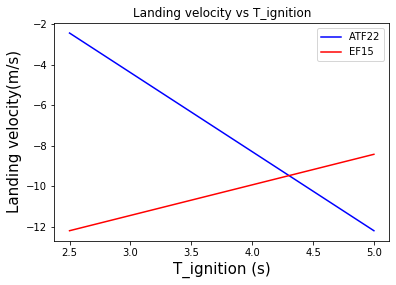

In [12]:
x=df_results1['t_ignition'].values
y1 = [df_results1['V_land'].values[0],df_results2['V_land'].values[0]]
y2 = [df_results1['V_land'].values[1],df_results2['V_land'].values[1]]
plt.figure(figsize=(8,6));
fig, ax = plt.subplots();
ax.plot(x, y1, '-b', label='ATF22');
ax.plot(x,y2,'-r',label='EF15');
ax.legend();
plt.xlabel('T_ignition (s)',fontsize=15);
plt.ylabel('Landing velocity(m/s)',fontsize=15);
plt.title('Landing velocity vs T_ignition');

## Part 4: Full Factorial

### Run experiment (on Mars)

In [13]:
# using the factors dictionary defined before:
factors_MN_modified =  {'thrust_curve': ['data/raw/thrust-curves/ATF22.csv','data/raw/thrust-curves/EB6.csv','data/raw/thrust-curves/EC11.csv',
                             'data/raw/thrust-curves/ED12.csv','data/raw/thrust-curves/EF15.csv'],
              't_ignition':[1.2,1.3,1.4,1.5,1.6,1.8,1.85,1.9,1.95,2.0,2.05,2.1,2.15,2.2,2.25,2.3,2.35,2.4,2.45,2.5,2.55,2.6,2.65,
                            2.7,2.75,2.8,2.85,2.9,2.95,3.0]}
df_MN_modified = lander.factorial_MN(factors_MN_modified)
df_MN_experiment_modified = lander.experiment(df_MN_modified,params_default)


print(df_MN_experiment_modified)


                        thrust_curve  t_ignition  T_land     V_land
0   data/raw/thrust-curves/ATF22.csv        1.20    0.00   0.000000
0   data/raw/thrust-curves/ATF22.csv        1.30    0.00   0.000000
0   data/raw/thrust-curves/ATF22.csv        1.40    0.00   0.000000
0   data/raw/thrust-curves/ATF22.csv        1.50    0.00   0.000000
0   data/raw/thrust-curves/ATF22.csv        1.60    0.00   0.000000
..                               ...         ...     ...        ...
0    data/raw/thrust-curves/EF15.csv        2.80    3.35 -10.234145
0    data/raw/thrust-curves/EF15.csv        2.85    3.35 -10.571143
0    data/raw/thrust-curves/EF15.csv        2.90    3.35 -10.942371
0    data/raw/thrust-curves/EF15.csv        2.95    3.35 -11.311921
0    data/raw/thrust-curves/EF15.csv        3.00    3.35 -11.620502

[150 rows x 4 columns]


In [14]:
import seaborn as sns


In [15]:
result = lander.pivot_df(df_MN_experiment_modified, idx='thrust_curve', cols='t_ignition', vals='V_land')
print(result)


t_ignition                             1.20       1.30       1.40       1.50  \
thrust_curve                                                                   
data/raw/thrust-curves/ATF22.csv   0.000000   0.000000   0.000000   0.000000   
data/raw/thrust-curves/EB6.csv   -11.787428 -11.603723 -11.603183 -11.602609   
data/raw/thrust-curves/EC11.csv  -11.339780 -11.155498 -11.154523 -10.970030   
data/raw/thrust-curves/ED12.csv  -10.171422  -9.985877  -9.800135  -9.614195   
data/raw/thrust-curves/EF15.csv    0.000000  -6.498793  -5.570203  -4.455130   

t_ignition                             1.60       1.80       1.85       1.90  \
thrust_curve                                                                   
data/raw/thrust-curves/ATF22.csv   0.000000   0.000000   0.000000   0.000000   
data/raw/thrust-curves/EB6.csv   -11.602000 -11.417406 -11.417054 -11.416694   
data/raw/thrust-curves/EC11.csv  -10.968915 -10.782957 -10.598715 -10.598044   
data/raw/thrust-curves/ED12.csv   -9.42

Text(68.99999999999999, 0.5, 'thrust_curve')

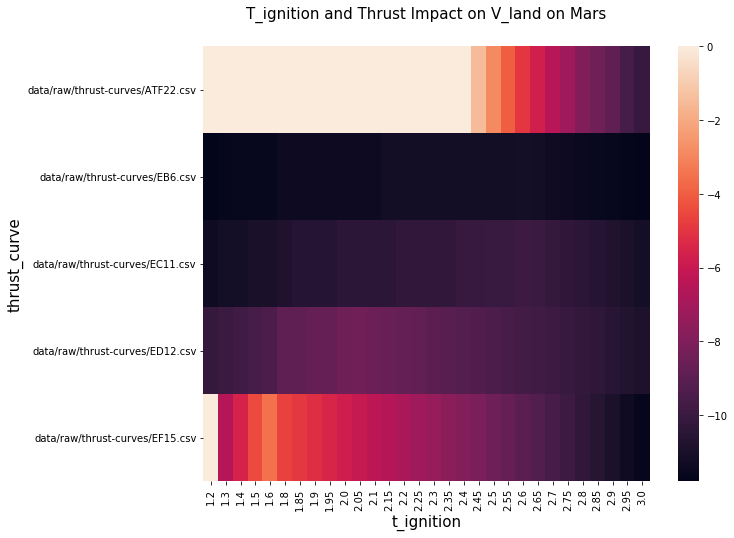

In [38]:
fig,ax = plt.subplots(figsize=(10,8));
title = 'T_ignition and Thrust Impact on V_land on Mars'
plt.title(title,fontsize=15);
ttl  = ax.title
ttl.set_position([0.5,1.05])
ax.set_xticks([])
ax.set_yticks([])


sns.heatmap(result,fmt='V_land')
plt.xlabel('t_ignition',fontsize=15)
plt.ylabel('thrust_curve',fontsize=15)
#according to the heatmap below, the velocity that most satifies our landing velocity requirement(around -3m/s) corresponds to the 
#colorbar ranges from 0 to -3(can't be equal or larger than 0, otherwise it's not landing at all but flying upwards). Upon inspecting the heatmap, we find that the best design is to 
#use EF15 thruster with a T_ignition between 1.55 and 1.65 or use ATF22 thruster with T_ignition between 2.4 and 2.55


### Part 5

In [17]:
#modifying our factorial_MN function
def factorial_env(factors):
    df = pd.DataFrame()
    for i in factors['body_mass']:
        for j in factors['position']:
            data = {'body_mass':[i],'position':[j]}
            data_frame = pd.DataFrame(data)
            df = df.append(data_frame)
    return df

In [18]:

factors_design = {'body_mass': [0.16,0.26,0.36,0.46,0.56,0.66,0.76
                             ],
              'position':[5,10,15,20,25,30]}

df_design = factorial_env(factors_design)
df_design[0:10]

,body_mass,position
0,0.16,5
0,0.16,10
0,0.16,15
0,0.16,20
0,0.16,25
0,0.16,30
0,0.26,5
0,0.26,10
0,0.26,15
0,0.26,20


### Get best design

In [19]:
env_experiment = lander.experiment_env(df_design, params_default);
print(env_experiment);

   body_mass  position  T_land     V_land
0       0.16         5    1.70  -6.289093
0       0.16        10    2.40  -8.850710
0       0.16        15    2.90 -10.663451
0       0.16        20    3.35 -10.314719
0       0.16        25    0.00   0.000000
0       0.16        30    0.00   0.000000
0       0.26         5    1.70  -6.293863
0       0.26        10    2.35  -8.681267
0       0.26        15    2.90 -10.687268
0       0.26        20    3.35 -10.830255
0       0.26        25    3.90  -6.301911
0       0.26        30    0.00   0.000000
0       0.36         5    1.70  -6.296766
0       0.36        10    2.35  -8.688996
0       0.36        15    2.90 -10.701806
0       0.36        20    3.35 -11.143878
0       0.36        25    3.85  -8.113623
0       0.36        30    4.60  -5.271405
0       0.46         5    1.70  -6.298718
0       0.46        10    2.35  -8.694199
0       0.46        15    2.90 -10.711603
0       0.46        20    3.35 -11.354786
0       0.46        25    3.80  -9

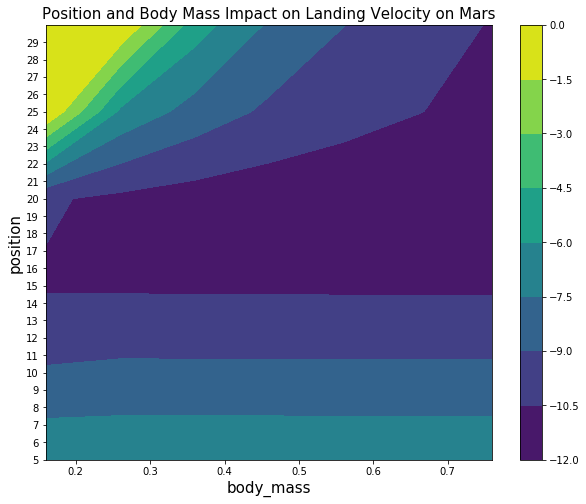

In [29]:
results_env = lander.pivot_df(env_experiment,idx='position', cols='body_mass', vals='V_land')
plt.figure(figsize=(10,8));
lander.pivoted2contourf(results_env);
plt.xlabel('body_mass',fontsize=15);
plt.ylabel('position',fontsize=15);
plt.yticks(np.arange(5,30,1));

plt.title('Position and Body Mass Impact on Landing Velocity on Mars',fontsize=15);
# same as in the heatmap above, the colorbar values indicate values of V_land
#Upon inspecting the colorfilled map below, we observe that with an initial altitude of 23.5 and 24.5 meters and a body mass
#between 0.2 and 0.35 while fixing all other environment variables fixed, the response landing velocity is in the acceptable range (no less than -3).
                                       

### Run experiment (on Earth)

In [21]:
body_params = {'body_mass': 0.66,
               'body_diameter': 0.0762,
               'body_length': 0.5,
               'bod_cd': 1.2}
fin_params = {'fin_mass': 0.05,
              'fin_height': 0.064,
              'fin_width': 0.099,
              'fin_cd': 1.20,
              'n_fins': 3}  
initial_params = {'position': 20,
                  'velocity': 0,
                  'acceleration': 0}
env_params = {'density': 1.23,
              'g': 9.81}  
sim_params = {'thruster_efficiency': 0.25,
               'thrust_curve':'data/raw/thrust-curves/ATF22.csv',
              't_ignition': 3.0,
              't_step': 0.05,
              't_final': 6}

params_earth =  {**body_params, **fin_params,**initial_params,**env_params,**sim_params}



In [22]:
factors_earth =  {'thrust_curve': ['data/raw/thrust-curves/ATF22.csv','data/raw/thrust-curves/EB6.csv','data/raw/thrust-curves/EC11.csv',
                             'data/raw/thrust-curves/ED12.csv','data/raw/thrust-curves/EF15.csv'],
              't_ignition':[1.2,1.3,1.4,1.5,1.6,1.8,1.85,1.9,1.95,2.0,2.05,2.1,2.15,2.2,2.25,2.3,2.35,2.4,2.45,2.5,2.55,2.6,2.65,
                            2.7,2.75,2.8,2.85,2.9,2.95,3.0]}
df_earth = lander.factorial_MN(factors_earth)
experiment_earth = lander.experiment(df_earth,params_earth)


In [23]:
result_earth = lander.pivot_df(experiment_earth, idx='thrust_curve', cols='t_ignition', vals='V_land')

### Plot design space

Text(68.99999999999999, 0.5, 'thrust_curve')

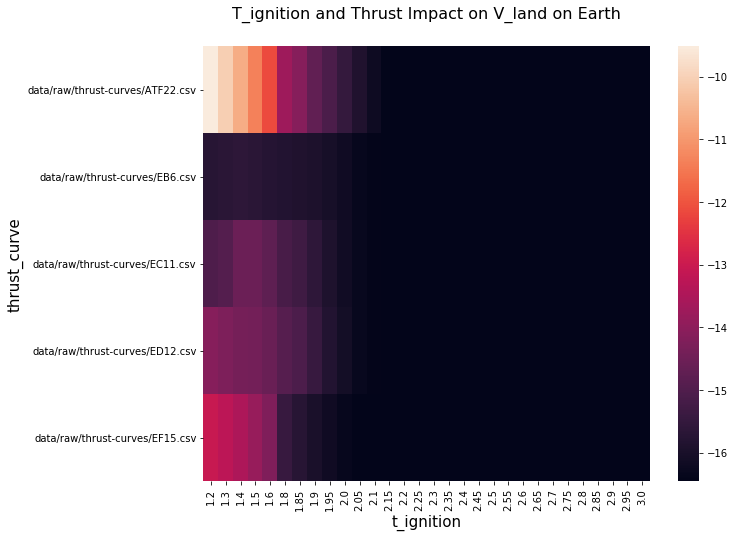

In [37]:
# first heatmap 
fig,ax = plt.subplots(figsize=(10,8));
title = 'T_ignition and Thrust Impact on V_land on Earth'
plt.title(title,fontsize=16);
ttl  = ax.title
ttl.set_position([0.5,1.05])
ax.set_xticks([])
ax.set_yticks([])

sns.heatmap(result_earth,fmt='V_land')
plt.xlabel('t_ignition',fontsize=15)
plt.ylabel('thrust_curve',fontsize=15)

In [25]:
factors_earth2 ={ 'body_mass': [0.06,0.16,0.26,0.36,0.46,0.56,0.66,0.76
                             ],
              'position':[5,10,15,20,25,30]}
df_earth2 = lander.factorial_env(factors_earth2)
experiment_earth2 = lander.experiment_env(df_earth2,params_earth)

In [26]:
result_earth2 = lander.pivot_df(experiment_earth2, idx='position', cols='body_mass', vals='V_land')

Text(69.0, 0.5, 'position')

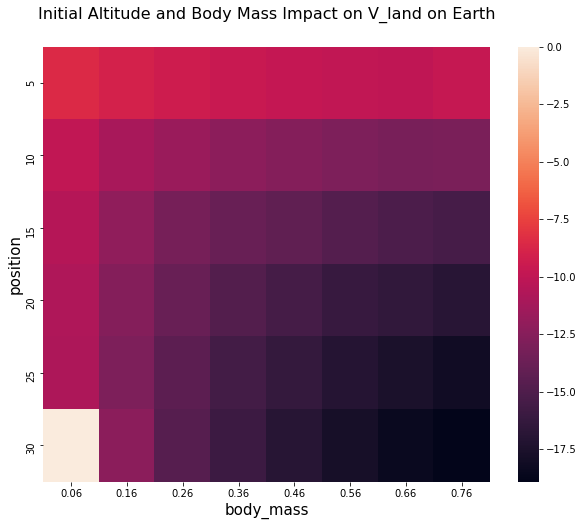

In [36]:
#2nd heatmap
fig,ax = plt.subplots(figsize=(10,8));
title = 'Initial Altitude and Body Mass Impact on V_land on Earth'
plt.title(title,fontsize=16);
ttl  = ax.title
ttl.set_position([0.5,1.05])
ax.set_xticks([])
ax.set_yticks([])

sns.heatmap(result_earth2,fmt='V_land')
plt.xlabel('body_mass',fontsize=15)
plt.ylabel('position',fontsize=15)
# comparing the heatmap below to that in the cell above, we identify that with all other parameters fixed, initial altitude and 
# body mass of the lander have a greater imapct on landing velocity when the lander is on earth because the density on earth is less
# than that on Mars, while gravity on earth is greater than that on Mars. 
